<a href="https://colab.research.google.com/github/Klarisa12/Kelompok-8_Tugas-Besar-Analitik/blob/main/Tubes_Metode_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score # Import regression metrics

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Praktikum2/super store1.xlsx')
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,è®°å½•æ•°,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,Delivery_Time
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0,US,1,2011-01-07,CA-2011-130813,...,19,Consumer,2011-01-09,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0,US,1,2011-01-21,CA-2011-148614,...,19,Consumer,2011-01-26,Standard Class,0.94,California,Paper,2011,North America,5
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0,US,1,2011-08-05,CA-2011-118962,...,21,Consumer,2011-08-09,Standard Class,1.81,California,Paper,2011,North America,4
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0,US,1,2011-08-05,CA-2011-118962,...,111,Consumer,2011-08-09,Standard Class,4.59,California,Paper,2011,North America,4
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0,US,1,2011-09-29,CA-2011-146969,...,6,Consumer,2011-10-03,Standard Class,1.32,California,Paper,2011,North America,4


In [ ]:
# Konversi kolom tanggal
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])

In [ ]:
df['delivery_duration'] = (df['Ship.Date'] - df['Order.Date']).dt.days
df = df[df['delivery_duration'] > 0]

In [ ]:
# Pilih kolom relevan
columns_used = ['Ship.Mode', 'Segment', 'Category', 'Shipping.Cost',
                'Sales', 'Quantity', 'Discount', 'delivery_duration']
df = df[columns_used].dropna()

In [ ]:
# Hapus kolom yang tidak relevan (seperti di Langkah 11)
drop_columns = ['Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name',
                'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Product Name', 'Profit', 'Row ID']
df.drop(columns=[col for col in drop_columns if col in df.columns], inplace=True)

In [ ]:
# Label Encoding untuk kolom kategorikal
label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,Ship.Mode,Segment,Category,Shipping.Cost,Sales,Quantity,Discount,delivery_duration
0,2,0,0,4.37,19,3,0,2
1,3,0,0,0.94,19,2,0,5
2,3,0,0,1.81,21,3,0,4
3,3,0,0,4.59,111,2,0,4
4,3,0,0,1.32,6,1,0,4


In [ ]:
X = df.drop(columns='delivery_duration')
y = df['delivery_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model dengan Gini
tree_gini = DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=42)
tree_gini.fit(X_train, y_train)

# Model dengan "entropy" hanya berlaku untuk klasifikasi, jadi kita pakai satu model saja (regresi)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
y_pred = tree_gini.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} hari")
print(f"RMSE: {rmse:.2f} hari")
print(f"R² Score: {r2:.2f}")

MAE: 0.98 hari
RMSE: 1.20 hari
R² Score: 0.42


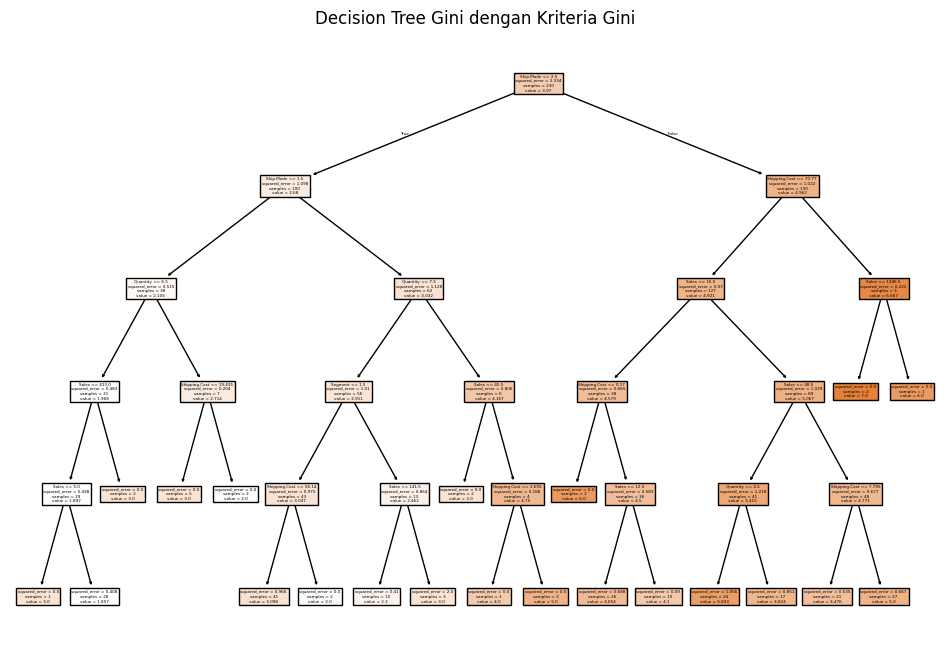

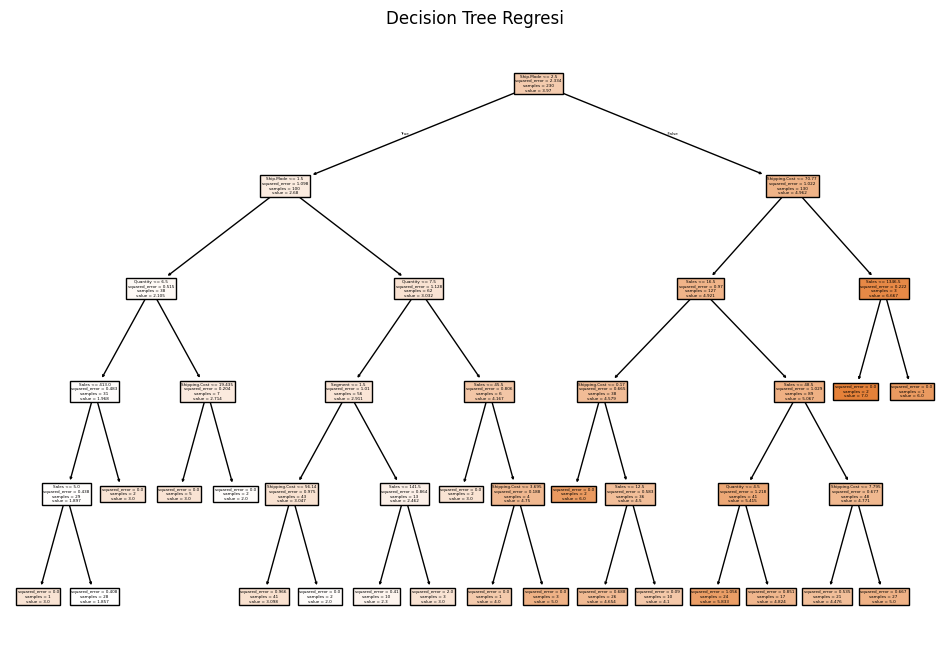

In [ ]:
plt.figure(figsize=(12, 8))
# Remove class_names as it's a regression tree
plot_tree(tree_gini, feature_names=X.columns, filled=True)
plt.title('Decision Tree Gini dengan Kriteria Gini')
plt.show()

plt.figure(figsize=(12, 8))
# Remove class_names and use tree_gini since tree_entropy is commented out
plot_tree(tree_gini, feature_names=X.columns, filled=True)
plt.title('Decision Tree Regresi') # Updated title as it's a regression tree
plt.show()

In [ ]:
akurasi_persen = r2 * 100
print(f"Akurasi Model (berdasarkan R²): {akurasi_persen:.2f}%")

Akurasi Model (berdasarkan R²): 41.70%


In [ ]:
testing1 = pd.DataFrame({
    'Ship.Mode': [2], # Assuming 2 is a valid encoded value for Ship.Mode
    'Segment': [1],   # Add the 'Segment' feature
    'Category': [1],  # Assuming 1 is a valid encoded value for Category
    'Shipping.Cost': [20.0], # Use float for consistency if original data was float
    'Sales': [12345.0],    # Use float for consistency if original data was float
    'Quantity': [220],
    'Discount': [0.2]})

testing1 = testing1[X_train.columns]

In [ ]:
# Use tree_gini (the trained model) to make the prediction
y_pred_1 = tree_gini.predict(testing1)

print(f'Hasil Prediksi 1 : {y_pred_1}')

Hasil Prediksi 1 : [5.]
